In [64]:
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTewqnMlj9e7LvW9jaeGp1O5AMhVXP0tmkTY2317iRuyM8A0p5ad7IbhUuuaPMyNVmRIqAkZ_HbjcI1/pub?output=csv')

In [66]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  object 
 7   longitude                       48895 non-null  object 
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [69]:
# Handle missing categorical values
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# Reviews-related missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['has_review'] = df['last_review'].notna().astype(int)

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.794417
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.404131
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,1.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,1.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000


# Exploratory Data Analysis

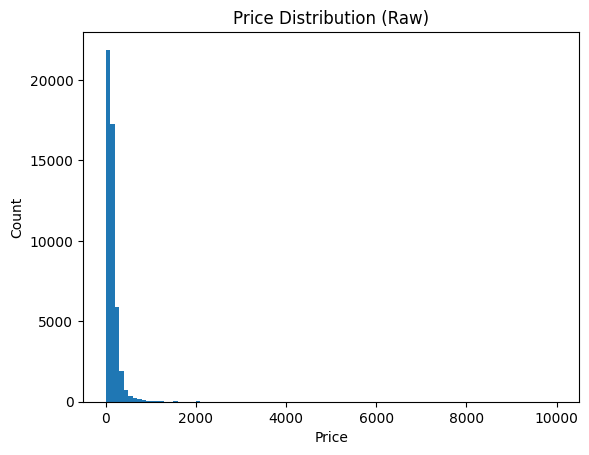

In [72]:
plt.hist(df['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution (Raw)')
plt.show()

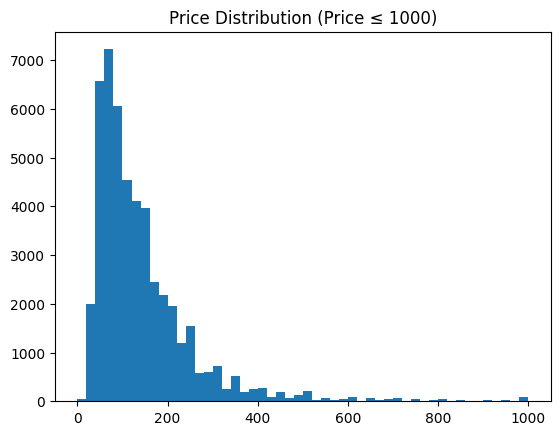

In [73]:
plt.hist(df[df['price'] <= 1000]['price'], bins=50)
plt.title('Price Distribution (Price ≤ 1000)')
plt.show()

After excluding listings priced above $1,000, the price distribution becomes more interpretable while preserving the natural right-skew typical of accommodation pricing data. Most listings fall within the lower to mid-price range, indicating this segment represents the core NYC Airbnb market.

In [74]:
df_price = df[df['price'] <= 1000]
df_price.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,has_review
count,4.865600e+04,4.865600e+04,48656.000000,48656.000000,48656.000000,48656.000000,48656.000000,48656.000000,48656.000000
mean,1.901705e+07,6.761238e+07,141.279842,6.973549,23.357304,1.094671,7.161892,112.444858,0.796120
std,1.097870e+07,7.859467e+07,116.737468,20.265616,44.630417,1.599479,33.022951,131.429862,0.402885
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.475115e+06,7.829861e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,1.000000
50%,1.967574e+07,3.081249e+07,105.000000,3.000000,5.000000,0.380000,1.000000,44.000000,1.000000
75%,2.913608e+07,1.074344e+08,175.000000,5.000000,24.000000,1.590000,2.000000,226.000000,1.000000
max,3.648724e+07,2.743213e+08,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000


Initial exploration shows a heavily right-skewed price distribution with extreme outliers. To avoid distorted aggregate insights, prices above the 99th percentile were excluded from the core analysis.

In [75]:
df['stay_type'] = df['minimum_nights'].apply(
    lambda x: 'Short-term' if x <= 30 else 'Long-term'
)

Outlier analysis focused on business-critical numerical variables. Price and minimum_nights were closely examined due to their significant skew and impact on market interpretation, while other extreme values were preserved as they represent valid business scenarios rather than data quality issues.

In [78]:
df_price_neighbouhood = df_price.copy()

/tmp/ipython-input-2130900953.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


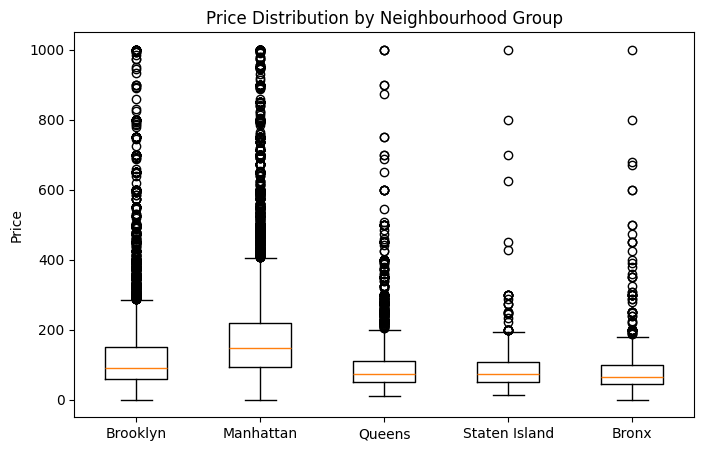

In [80]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_price_neighbouhood[df_price_neighbouhood['neighbourhood_group'] == ng]['price']
     for ng in df_price_neighbouhood['neighbourhood_group'].unique()],
    labels=df_price_neighbouhood['neighbourhood_group'].unique()
)
plt.ylabel('Price')
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

Pricing differs significantly across NYC boroughs, with Manhattan showing the highest median and widest dispersion, while outer boroughs exhibit lower and more concentrated price ranges.

In [81]:
df_price_room = df_price.copy()

/tmp/ipython-input-3088891026.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


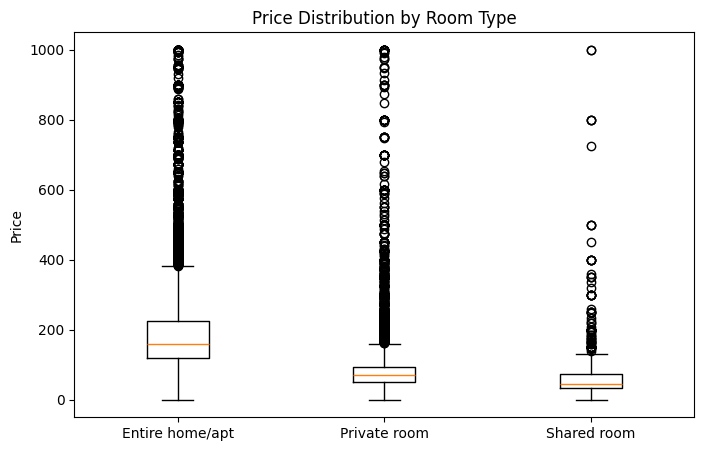

In [82]:
room_order = (
    df_price_room.groupby('room_type')['price']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(8,5))
plt.boxplot(
    [df_price_room[df_price_room['room_type'] == rt]['price'] for rt in room_order],
    labels=room_order
)
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()

Analysis by room type shows that entire homes are priced significantly higher, while private rooms offer a more affordable option with narrower price variation, indicating clearer market segmentation.

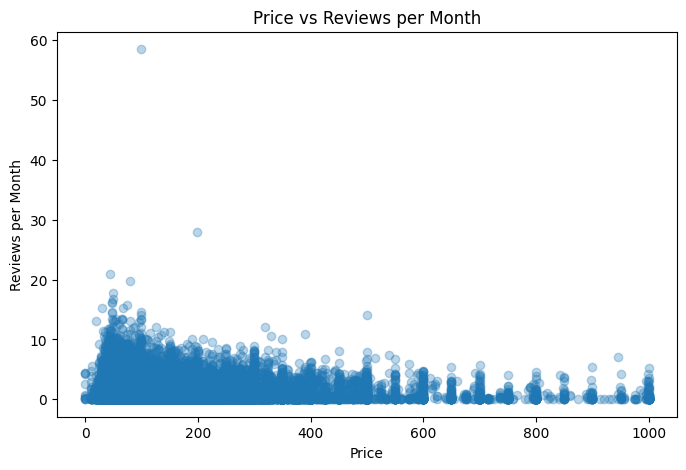

In [83]:
# Which listings are actually in demand, and how does price relate to booking activity?

plt.figure(figsize=(8,5))
plt.scatter(
    df_price['price'],
    df_price['reviews_per_month'],
    alpha=0.3
)
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.title('Price vs Reviews per Month')
plt.show()

Listings priced in the lower to mid-range tend to receive more frequent reviews, indicating higher demand compared to premium-priced listings.

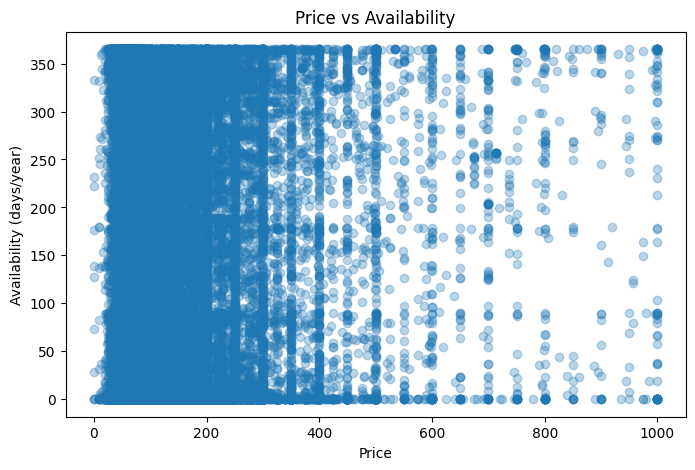

In [84]:
plt.figure(figsize=(8,5))
plt.scatter(
    df_price['price'],
    df_price['availability_365'],
    alpha=0.3
)
plt.xlabel('Price')
plt.ylabel('Availability (days/year)')
plt.title('Price vs Availability')
plt.show()

Higher-priced listings tend to have higher availability, suggesting lower booking frequency.

In [85]:
df_price['price_segment'] = pd.cut(
    df_price['price'],
    bins=[0,100,200,500,1000],
    labels=['Budget','Mid','Upper-Mid','Premium']
)

/tmp/ipython-input-2491403216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['price_segment'] = pd.cut(


In [86]:
df_price.groupby('price_segment')['reviews_per_month'].median()


/tmp/ipython-input-3590383527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_price.groupby('price_segment')['reviews_per_month'].median()


,reviews_per_month
price_segment,
Budget,0.42
Mid,0.37
Upper-Mid,0.28
Premium,0.19


Demand analysis using review activity shows that lower to mid-priced Airbnb listings attract significantly higher engagement, while premium listings tend to remain available for longer periods, indicating lower occupancy rates.

# Final Insights

1. Pricing Structure of the NYC Airbnb Market

The NYC Airbnb market shows a strong right-skewed price distribution, with the majority of listings concentrated in the low to mid-price range. Listings priced above $500 exist but represent a relatively small portion of the market. This indicates that the core Airbnb market in NYC primarily caters to budget-conscious to mid-range travelers rather than luxury segments.

2. Price Differences Across Neighbourhood Groups

Significant price variation exists across neighbourhood groups:

Manhattan consistently records the highest median prices, reflecting its central location, accessibility, and concentration of commercial, cultural, and business districts.

Brooklyn offers comparatively lower median prices while maintaining a large number of active listings, positioning it as a strong alternative for guests seeking value.

Bronx and Staten Island exhibit the lowest median prices, suggesting lower demand or trade-offs related to distance and accessibility.

Rather than relying on general assumptions, these conclusions are directly supported by observed price distributions and medians across boroughs.

3. Role of Room Type in Pricing

Room type plays a critical role in determining price levels:

Entire home/apartment listings command the highest prices across all boroughs.

Private rooms occupy a mid-range price segment and represent a balance between affordability and privacy.

Shared rooms consistently fall into the lowest price range, indicating limited willingness to pay for shared accommodations in the NYC market.

This highlights room type as a controllable pricing lever for hosts, independent of location constraints.

4. Availability as a Market Signal

Availability patterns show substantial variation, with some listings available year-round and others showing limited availability. High availability may indicate either pricing mismatches or lower demand, while low availability can reflect strong booking frequency. Availability should therefore be interpreted as a contextual demand signal rather than an indicator of listing quality.

# Business Recommendation

1. Pricing Strategy for Hosts

Hosts should align pricing with borough-specific market norms rather than relying on city-wide averages. Manhattan listings may sustain higher prices, but pricing beyond market medians risks reduced occupancy. In contrast, Brooklyn listings benefit from competitive pricing strategies that emphasize value relative to Manhattan.

2. Location Strategy

Property location should be viewed as a structural constraint rather than a tactical decision. The analysis does not assume that hosts can easily purchase new properties in premium locations such as Manhattan, given high land and property costs.

Instead, location-based insights are most applicable for:

Hosts who already own properties

Long-term investors evaluating rental feasibility

Platform-level strategic analysis

For individual hosts, location insights serve as market context, not direct action items.

3. Room Type Optimization

Room type optimization does not imply forcing hosts to convert shared rooms into entire homes, which may be infeasible due to space, regulation, or ownership constraints.

Rather, the analysis suggests:

Where feasible, private rooms offer a strong balance between affordability and pricing power.

Entire home listings capture premium pricing but require higher operational and regulatory readiness.

Shared rooms remain viable only in price-sensitive segments.

4. Managing Availability and Demand

Hosts should monitor availability alongside pricing. Persistently high availability may signal misaligned pricing or mismatched room types relative to market expectations. Adjustments should prioritize incremental price testing rather than drastic changes.

# Final Conclusion

This analysis demonstrates that NYC Airbnb pricing is shaped by a combination of location, room type, and availability dynamics, with price serving as the central market signal. While location imposes structural constraints, room type and pricing strategies offer hosts practical levers to optimize performance. Effective decision-making therefore requires balancing fixed constraints with controllable operational choices.